In [4]:
#%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

#from sklearn.datasets import fetch_mldata
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

import graphviz 
import statsmodels.api as sm
from sklearn import tree
import xgboost as xgb
from sklearn.decomposition import PCA

In [5]:

data_set = 'C:\\Users\\ferri\\Downloads\\PoliTO\\Tesi\\DSs\\Stress\\\WESAD\\'
s2_path = data_set + 'S2/S2.pkl'
#DO-NOT enable all at once otherwise Laptop goes to sleep due to very huge data size.
#s3_path = data_set + 'S3/S3.pkl'
#s4_path = data_set + 'S4/S4.pkl'
#s5_path = data_set + 'S5/S5.pkl'
#s6_path = data_set + 'S6/S6.pkl'
#s7_path = data_set + 'S7/S7.pkl
#s8_path = data_set + 'S8/S8.pkl'
#s9_path = data_set + 'S9/S9.pkl'
#s10_path = data_set + 'S10/S10.pkl'
#s11_path = data_set + 'S11/S11.pkl'
#s13_path = data_set + 'S13/S13.pkl'
#s14_path = data_set + 'S14/S14.pkl'
#s15_path = data_set + 'S15/S15.pkl'
#s16_path = data_set + 'S16/S16.pkl'
#s17_path = data_set + 'S17/S17.pkl'

with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
'''
with open(s3_path, 'rb') as file:
    s3_data = pickle.load(file, encoding='latin1')
    
with open(s4_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s5_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s6_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
with open(s17_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
'''

"\nwith open(s3_path, 'rb') as file:\n    s3_data = pickle.load(file, encoding='latin1')\n    \nwith open(s4_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s5_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s6_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\nwith open(s17_path, 'rb') as file:\n    s2_data = pickle.load(file, encoding='latin1')\n"

In [6]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")

Equated


In [7]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")



data frame combined


In [8]:
display(df.shape)
display(df.info)
display(df.describe)

(4255300, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [10]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)


(2100456, 9)


In [11]:
#mean normalization 
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)


norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)


In [12]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,-1.678430,2.251221,-1.593856,-0.326259,-0.675595,3.563482,-4.750996,-0.416753,-0.108962
394476,-1.697992,2.116280,-1.564093,-1.913346,-1.408406,3.553901,-4.753546,0.864869,-0.108962
395154,-1.710440,2.244120,-1.574550,0.843406,1.302484,3.587000,-4.748553,-0.731728,-0.108962
396635,-1.746005,1.952928,-1.606727,-1.452419,0.221203,3.586129,-4.753546,1.121464,-0.108962
402178,-1.712218,2.158892,-1.596269,0.766310,-0.537232,3.553901,-4.571494,0.949722,-0.108962


In [13]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,1.682200e-16,6.227062e-17,-1.660144e-16,6.819729e-18,-1.407246e-17,-3.169550e-16,-2.865856e-15,-1.104147e-17,4.483701e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.534372e+00,-3.814046e+00,-2.495604e+00,-2.629794e+00,-2.776663e+00,-1.856971e+00,-4.756042e+00,-2.715254e+00,-7.712019e-01
25%,-1.750292e-02,-6.535731e-01,-4.483708e-01,-5.757211e-01,-6.448473e-01,-7.211407e-01,-6.176719e-01,-7.154357e-01,-7.712019e-01
50%,4.164009e-01,-8.539912e-02,1.235676e-01,2.470093e-01,6.234153e-02,-1.995722e-02,-1.520821e-01,-1.092451e-01,-7.712019e-01
75%,6.226834e-01,5.537980e-01,5.812790e-01,6.049576e-01,6.619147e-01,3.711377e-01,7.266278e-01,7.331766e-01,5.532788e-01
max,4.150819e+00,3.856315e+00,3.420860e+00,2.775776e+00,2.732236e+00,3.596582e+00,3.874975e+00,2.802235e+00,1.877759e+00


In [14]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


In [15]:
norm_df_out.shape

(2100456, 9)

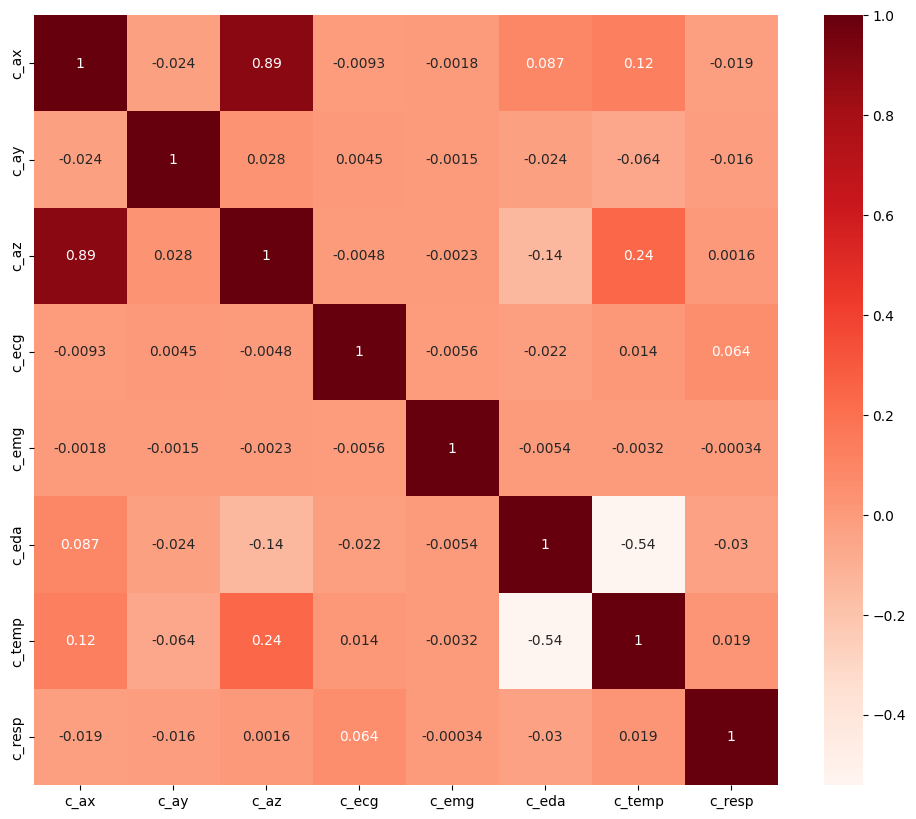

In [16]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:

X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     7.725890e-02
c_emg     3.944850e-33
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [19]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [20]:
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [21]:
norm_x_train

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1495518,0.503537,-0.625164,0.285255,-0.142879,0.923267,0.045370,-1.315871,-0.506358
3525232,0.636909,-0.895047,0.489576,-0.797649,-0.706342,-0.853538,1.626262,1.245011
2379298,0.859197,-3.224566,0.742162,-1.847264,-0.429616,1.065353,-1.554693,1.912974
1664417,0.402174,-0.248749,0.157353,-0.355445,-0.409118,0.483501,-0.402960,1.557949
1960272,0.331042,0.063748,0.010950,0.396246,-0.286128,3.528641,-0.668708,-0.764990
...,...,...,...,...,...,...,...,...
2706534,0.099865,-2.301281,-0.277835,0.196897,1.036007,-0.222037,0.819459,-1.971941
2717146,0.606678,-0.838231,0.526579,1.637501,0.405687,-0.278655,0.963963,2.057564
1131903,0.000280,-0.468917,-0.438718,-0.262929,0.769530,0.347620,0.119720,-0.609539
3291914,0.692037,0.724251,1.692174,-1.640204,-0.583353,-0.789953,-0.118731,0.754220


In [22]:
norm_y_train

1495518    0.0
3525232    3.0
2379298    0.0
1664417    2.0
1960272    2.0
          ... 
2706534    0.0
2717146    0.0
1131903    0.0
3291914    0.0
2996648    4.0
Name: w_label, Length: 1680364, dtype: float64

In [23]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1146402,-0.003276,-0.319770,-0.387235,-1.877552,-1.398157,0.174284,0.476865,-0.263338
1466916,0.563999,-0.071195,0.311800,-0.218874,0.323694,0.108956,-1.483583,0.889985
3687963,0.683145,-0.539938,1.482222,0.300977,-1.249545,-0.628811,0.595294,-1.143095
1348296,0.435962,-2.897864,-0.170043,2.101182,0.415936,0.003561,-0.750387,-0.739195
3210675,0.679589,2.023951,0.726074,0.179274,1.717573,-0.789081,0.312286,-0.657057
...,...,...,...,...,...,...,...,...
1547240,0.473306,-0.525734,0.216075,-0.818025,-0.245132,0.132474,-0.005984,-1.896591
1746054,0.708041,-0.113808,0.423614,2.597904,-0.778086,0.725649,-0.090584,-0.431687
1100426,-0.081522,0.227098,-0.451588,0.166609,0.185331,0.499180,-0.510342,-0.420147
3742026,0.715154,-2.990193,0.811341,-0.829589,2.337645,-0.717657,0.592692,-2.332397


In [24]:
norm_y_test

1146402    0.0
1466916    0.0
3687963    0.0
1348296    0.0
3210675    0.0
          ... 
1547240    0.0
1746054    2.0
1100426    0.0
3742026    0.0
1729877    2.0
Name: w_label, Length: 420092, dtype: float64

In [25]:

y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [26]:
(x_train)


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
2179424,0.8538,-0.1098,-0.3430,0.010345,-0.012131,1.699829,30.697601,2.410889
3271966,0.8922,-0.0990,0.2070,-0.109634,-0.005402,0.766754,31.310516,2.824402
3387457,0.9098,-0.1454,-0.0662,0.040878,0.001648,0.815964,32.098328,-0.408936
1816529,0.8906,-0.1128,-0.2888,-0.117966,-0.012955,1.494217,31.040192,1.556396
2865630,0.6244,-0.0920,-0.7160,0.007004,-0.001511,0.965118,31.546204,-0.947571
...,...,...,...,...,...,...,...,...
2825849,0.9082,-0.0450,-0.0902,-0.115402,0.007645,0.894547,31.978119,-2.232361
3120226,0.5662,-0.1334,-0.7642,0.035706,0.008286,0.765991,31.313416,-0.654602
1900077,0.8802,-0.1474,-0.2694,0.059738,-0.004578,1.980972,31.360535,0.531006
3274555,0.8910,-0.1014,0.2018,-0.095718,0.014557,0.784302,31.316376,-2.008057


In [27]:

(y_train)


2179424    0.0
3271966    0.0
3387457    3.0
1816529    2.0
2865630    0.0
          ... 
2825849    0.0
3120226    4.0
1900077    2.0
3274555    0.0
3350192    3.0
Name: w_label, Length: 1680364, dtype: float64

In [28]:
(x_test)


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1573240,0.8874,-0.1202,-0.1988,0.208786,0.002518,1.224136,31.128235,-1.722717
2849728,0.9186,-0.1134,-0.1590,-0.034241,-0.013870,0.896072,31.584625,1.666260
1342512,0.8392,-0.1498,-0.3314,0.085281,0.005219,1.093292,31.005005,-1.927185
1021591,0.8274,-0.0450,-0.4382,-0.171204,-0.005035,1.265335,29.498352,-1.940918
1797050,0.8586,-0.1276,-0.2556,-0.044357,-0.020645,1.521301,31.081268,2.253723
...,...,...,...,...,...,...,...,...
1176747,0.8200,-0.1150,-0.4190,0.025085,-0.016342,1.232910,31.899567,-1.564026
3114456,0.5678,-0.1374,-0.7586,0.005173,0.002975,0.777435,31.325195,0.569153
3357562,0.9068,-0.1508,-0.0822,-0.013962,0.011856,0.749969,31.813690,1.179504
3006758,0.5840,-0.1278,-0.7484,0.056259,-0.010483,0.821686,31.335510,-0.752258


In [29]:
(y_test)


1573240    0.0
2849728    0.0
1342512    0.0
1021591    0.0
1797050    2.0
          ... 
1176747    0.0
3114456    4.0
3357562    3.0
3006758    4.0
2413850    0.0
Name: w_label, Length: 420092, dtype: float64

# Logistic Regression Base Model

In [31]:
clf = skl_lm.LogisticRegression(solver='newton-cg', penalty=None)
clf.fit(x_train, y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))

#takes 20 minutes.
'''
(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) or use slover=saga
'''                 

              precision    recall  f1-score   support

         0.0     0.8221    0.8927    0.8560    245743
         1.0     0.9737    0.9009    0.9359     10921
         2.0     0.7016    0.3988    0.5086     63464
         3.0     0.7882    0.8224    0.8049     47727
         4.0     0.9123    0.9997    0.9540     52237

    accuracy                         0.8236    420092
   macro avg     0.8396    0.8029    0.8119    420092
weighted avg     0.8152    0.8236    0.8119    420092



"\n(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=3,\n                   multi_class='warn', n_jobs=None, penalty='l2',\n                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,\n                   warm_start=False) or use slover=saga\n"

# Logistic Regression + L2

In [32]:
clf = skl_lm.LogisticRegression(solver='newton-cg',penalty='l2',multi_class='auto')
clf.fit(x_train,y_train)
y_out = clf.predict(x_test)
print(classification_report(y_test, y_out, digits=4))



C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0     0.8203    0.8935    0.8553    245743
         1.0     0.9799    0.8930    0.9344     10921
         2.0     0.7022    0.3955    0.5060     63464
         3.0     0.7877    0.8157    0.8014     47727
         4.0     0.9116    0.9999    0.9537     52237

    accuracy                         0.8226    420092
   macro avg     0.8403    0.7995    0.8102    420092
weighted avg     0.8142    0.8226    0.8107    420092



# LDA Basic Implementation

In [34]:
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(x_train, y_train).predict(x_test)
#confusion_matrix(y_test, y_out)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

         0.0     0.8122    0.8668    0.8386    245743
         1.0     0.9717    0.6406    0.7721     10921
         2.0     0.6246    0.3687    0.4637     63464
         3.0     0.7515    0.8143    0.7816     47727
         4.0     0.8504    1.0000    0.9192     52237

    accuracy                         0.7963    420092
   macro avg     0.8021    0.7381    0.7551    420092
weighted avg     0.7858    0.7963    0.7838    420092



# QDA Basic Implementation

In [36]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_out, digits=4))#target_names=['Not Six', 'Six']
#IF QDA is best, then data must be Gaussian

C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\ferri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing 

              precision    recall  f1-score   support

         0.0     0.9750    0.8961    0.9339    245743
         1.0     0.8721    0.9505    0.9096     10921
         2.0     0.7989    0.9311    0.8599     63464
         3.0     0.8912    0.9855    0.9360     47727
         4.0     0.9388    0.9989    0.9679     52237

    accuracy                         0.9257    420092
   macro avg     0.8952    0.9524    0.9214    420092
weighted avg     0.9317    0.9257    0.9265    420092



In [37]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=5)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8729    0.9031    0.8877   1230433
         1.0     0.8648    0.9317    0.8970     53659
         2.0     0.7485    0.7179    0.7329    316935
         3.0     0.9045    0.7139    0.7980    239191
         4.0     0.9389    0.9985    0.9678    260238

    accuracy                         0.8662   2100456
   macro avg     0.8659    0.8530    0.8567   2100456
weighted avg     0.8657    0.8662    0.8643   2100456



# QDA + Normalization + Cross Validation = 10

In [ ]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)   

              precision    recall  f1-score   support

         0.0     0.9473    0.8943    0.9200   1230433
         1.0     0.8798    0.9427    0.9101     53659
         2.0     0.7799    0.8881    0.8305    316935
         3.0     0.8922    0.9069    0.8995    239191
         4.0     0.9366    0.9985    0.9666    260238

    accuracy                         0.9089   2100456
   macro avg     0.8872    0.9261    0.9053   2100456
weighted avg     0.9127    0.9089    0.9097   2100456



'\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict\nhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate\n'

In [39]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.5)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8380    0.8037    0.8205   1230433
         1.0     0.9813    0.7941    0.8778     53659
         2.0     0.5829    0.4384    0.5005    316935
         3.0     0.6677    0.9552    0.7860    239191
         4.0     0.8780    1.0000    0.9350    260238

    accuracy                         0.7899   2100456
   macro avg     0.7896    0.7983    0.7840   2100456
weighted avg     0.7887    0.7899    0.7839   2100456



In [40]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.9)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7625    0.8220    0.7912   1230433
         1.0     0.9929    0.6342    0.7740     53659
         2.0     0.4651    0.3059    0.3690    316935
         3.0     0.6491    0.6136    0.6309    239191
         4.0     0.8525    1.0000    0.9204    260238

    accuracy                         0.7376   2100456
   macro avg     0.7444    0.6751    0.6971   2100456
weighted avg     0.7218    0.7376    0.7248   2100456



In [41]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.7)
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7977    0.8178    0.8076   1230433
         1.0     0.9887    0.7486    0.8521     53659
         2.0     0.5200    0.3503    0.4186    316935
         3.0     0.6728    0.8035    0.7324    239191
         4.0     0.8698    1.0000    0.9304    260238

    accuracy                         0.7664   2100456
   macro avg     0.7698    0.7440    0.7482   2100456
weighted avg     0.7554    0.7664    0.7567   2100456



# QDA + Normalization + Cross Validation = 20

In [42]:
qda_clf = QuadraticDiscriminantAnalysis()
norm_y_out = cross_val_predict(qda_clf, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9647    0.8873    0.9243   1230433
         1.0     0.8790    0.9432    0.9100     53659
         2.0     0.7730    0.9054    0.8340    316935
         3.0     0.8858    0.9719    0.9269    239191
         4.0     0.9369    0.9990    0.9670    260238

    accuracy                         0.9149   2100456
   macro avg     0.8879    0.9414    0.9124   2100456
weighted avg     0.9211    0.9149    0.9159   2100456



# KNN + Cross Validation + K=3 + Normalization [ CV = 10, K = 3 ]

In [43]:
#Do base mdel with test and train data, show improvement in next section with cross validation
knn = KNeighborsClassifier(n_neighbors=3)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)
#https://www.ritchieng.com/machine-learning-cross-validation/

              precision    recall  f1-score   support

         0.0     0.9245    0.8220    0.8702   1230433
         1.0     0.9086    0.8866    0.8974     53659
         2.0     0.7062    0.9154    0.7973    316935
         3.0     0.7487    0.8514    0.7968    239191
         4.0     0.9013    0.9397    0.9201    260238

    accuracy                         0.8557   2100456
   macro avg     0.8379    0.8830    0.8564   2100456
weighted avg     0.8683    0.8557    0.8577   2100456



# KNN + Cross Validation + K=5 + Normalization [ CV = 20, K = 5 ]

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=20)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9545    0.8799    0.9157   1230433
         1.0     0.9155    0.9165    0.9160     53659
         2.0     0.8234    0.9416    0.8785    316935
         3.0     0.8043    0.9206    0.8585    239191
         4.0     0.9060    0.9620    0.9332    260238

    accuracy                         0.9049   2100456
   macro avg     0.8807    0.9241    0.9004   2100456
weighted avg     0.9106    0.9049    0.9057   2100456



# KNN + Cross Validation + K=10 + Normalization [ CV = 10, K = 10 ]

In [45]:
knn = KNeighborsClassifier(n_neighbors=10)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9249    0.8253    0.8723   1230433
         1.0     0.9246    0.8831    0.9034     53659
         2.0     0.7107    0.9127    0.7992    316935
         3.0     0.7492    0.8527    0.7976    239191
         4.0     0.9024    0.9430    0.9222    260238

    accuracy                         0.8577   2100456
   macro avg     0.8423    0.8834    0.8589   2100456
weighted avg     0.8698    0.8577    0.8597   2100456



# KNN + Cross Validation [ CV = 10, K = 20 ]

In [46]:
knn = KNeighborsClassifier(n_neighbors=20)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9295    0.8213    0.8720   1230433
         1.0     0.9454    0.8815    0.9123     53659
         2.0     0.7058    0.9185    0.7982    316935
         3.0     0.7441    0.8621    0.7988    239191
         4.0     0.9030    0.9498    0.9258    260238

    accuracy                         0.8580   2100456
   macro avg     0.8456    0.8866    0.8614   2100456
weighted avg     0.8718    0.8580    0.8602   2100456



# KNN + Cross Validation [ CV = 10, K = 30 ]

In [47]:
knn = KNeighborsClassifier(n_neighbors=30)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9321    0.8199    0.8724   1230433
         1.0     0.9605    0.8802    0.9186     53659
         2.0     0.7034    0.9201    0.7973    316935
         3.0     0.7430    0.8689    0.8010    239191
         4.0     0.9037    0.9537    0.9280    260238

    accuracy                         0.8587   2100456
   macro avg     0.8485    0.8885    0.8635   2100456
weighted avg     0.8732    0.8587    0.8610   2100456



# KNN + Cross Validation [ CV = 10, K = 40 ]

In [48]:
knn = KNeighborsClassifier(n_neighbors=40)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9338    0.8191    0.8727   1230433
         1.0     0.9673    0.8792    0.9211     53659
         2.0     0.7017    0.9208    0.7964    316935
         3.0     0.7433    0.8738    0.8033    239191
         4.0     0.9042    0.9564    0.9296    260238

    accuracy                         0.8592   2100456
   macro avg     0.8501    0.8899    0.8646   2100456
weighted avg     0.8743    0.8592    0.8616   2100456



# KNN + Cross Validation [ CV = 10, K = 60 ]

In [10]:
knn = KNeighborsClassifier(n_neighbors=60)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9367    0.8185    0.8736   1230433
         1.0     0.9745    0.8774    0.9234     53659
         2.0     0.6999    0.9215    0.7956    316935
         3.0     0.7447    0.8825    0.8078    239191
         4.0     0.9046    0.9606    0.9318    260238

    accuracy                         0.8604   2100456
   macro avg     0.8521    0.8921    0.8664   2100456
weighted avg     0.8761    0.8604    0.8628   2100456



# KNN + Cross Validation [ CV = 10, K = 100 ]

In [9]:
knn = KNeighborsClassifier(n_neighbors=100)
norm_y_out = cross_val_predict(knn, norm_x, norm_y, cv=10)
lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9407    0.8172    0.8746   1230433
         1.0     0.9775    0.8741    0.9229     53659
         2.0     0.6977    0.9214    0.7941    316935
         3.0     0.7461    0.8951    0.8139    239191
         4.0     0.9049    0.9666    0.9347    260238

    accuracy                         0.8618   2100456
   macro avg     0.8534    0.8949    0.8680   2100456
weighted avg     0.8784    0.8618    0.8642   2100456



# Simple Decision Tree + Depth = 5

In [19]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_i = clf.fit(x_train,y_train)

y_out_i = clf_i.predict(x_test)

lm_i=(classification_report(y_test, y_out_i, digits=4))
print(lm_i)

 

              precision    recall  f1-score   support

         0.0     0.9638    0.9288    0.9460    245784
         1.0     0.9992    0.9574    0.9779     10896
         2.0     0.8718    0.9943    0.9290     63325
         3.0     0.8461    0.8750    0.8603     48085
         4.0     0.9871    0.9655    0.9762     52002

    accuracy                         0.9378    420092
   macro avg     0.9336    0.9442    0.9379    420092
weighted avg     0.9403    0.9378    0.9382    420092



# Displaying and Drwaing the Tree

In [ ]:
tree.plot_tree(clf_i) 

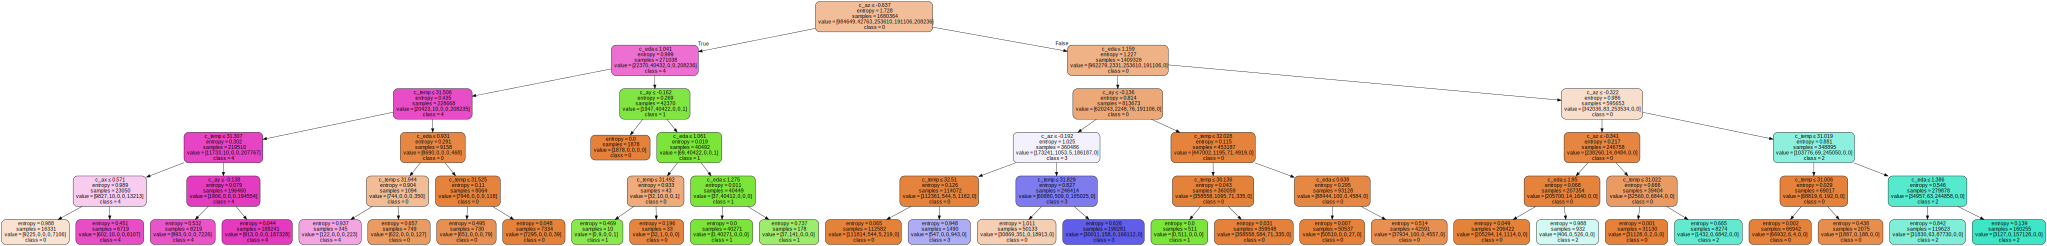

In [24]:
#from sklearn import tree
#https://scikit-learn.org/stable/modules/tree.html

features_ax=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp"]
classes_ay=['0', '1', '2', '3', '4']

dot_data = tree.export_graphviz(clf_i, out_file=None, 
                      feature_names=features_ax,  
                      class_names=classes_ay,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Decision_tree")
graph 


# Simple Decision Tree + Depth = 5 + Cross Validation + Normalization

In [25]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)


norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9361    0.8394    0.8851   1230433
         1.0     0.8022    0.9360    0.8640     53659
         2.0     0.8695    0.9808    0.9218    316935
         3.0     0.6209    0.7785    0.6908    239191
         4.0     0.9097    0.9685    0.9382    260238

    accuracy                         0.8723   2100456
   macro avg     0.8277    0.9007    0.8600   2100456
weighted avg     0.8835    0.8723    0.8746   2100456



# Simple Decision Tree + Depth = 7 + Normalization + Cross Validation

In [33]:

clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.9182    0.8495    0.8825   1230433
         1.0     0.8006    0.9444    0.8666     53659
         2.0     0.8734    0.8884    0.8809    316935
         3.0     0.6494    0.8274    0.7277    239191
         4.0     0.9077    0.9478    0.9273    260238

    accuracy                         0.8674   2100456
   macro avg     0.8299    0.8915    0.8570   2100456
weighted avg     0.8765    0.8674    0.8698   2100456



# Simple Decision Tree + Normalization + Cross Validation

## Criterion = Gini, Max_depth = 5, CV = 10

In [34]:

clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.8866    0.8848    0.8857   1230433
         1.0     0.9702    0.9373    0.9535     53659
         2.0     0.8993    0.7566    0.8218    316935
         3.0     0.6914    0.8289    0.7540    239191
         4.0     0.9065    0.9307    0.9184    260238

    accuracy                         0.8661   2100456
   macro avg     0.8708    0.8677    0.8667   2100456
weighted avg     0.8709    0.8661    0.8668   2100456



# XGB Implementation 

## Normalization + max_depth = 10, alpha = 10, n_estimators = 50, gamma=10

## colsample_bytree = 0.3, learning_rate = 0.1

In [ ]:
#https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
#https://www.datacamp.com/community/tutorials/xgboost-in-python
#https://medium.com/@gabrielziegler3/multiclass-multilabel-classification-with-xgboost-66195e4d9f2d

xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(x_train,y_train)

y_out = xg_class.predict(x_test)

lm_xgb=(classification_report(y_test, y_out, digits=4))

print(lm_xgb)


              precision    recall  f1-score   support

         0.0     0.9801    0.9839    0.9820    245889
         1.0     0.9994    0.9425    0.9701     10734
         2.0     0.9755    0.9539    0.9645     63716
         3.0     0.9821    0.9811    0.9816     47585
         4.0     0.9704    0.9910    0.9806     52168

    accuracy                         0.9788    420092
   macro avg     0.9815    0.9705    0.9758    420092
weighted avg     0.9789    0.9788    0.9788    420092



In [13]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=5)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8217    0.9206    0.8683   1230433
         1.0     0.8144    0.6845    0.7438     53659
         2.0     0.8549    0.6707    0.7517    316935
         3.0     0.8058    0.6221    0.7022    239191
         4.0     0.9284    0.8689    0.8977    260238

    accuracy                         0.8365   2100456
   macro avg     0.8451    0.7534    0.7927   2100456
weighted avg     0.8379    0.8365    0.8323   2100456



In [12]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.8933    0.9260    0.9093   1230433
         1.0     0.8757    0.7754    0.8225     53659
         2.0     0.9078    0.8077    0.8548    316935
         3.0     0.8205    0.8011    0.8107    239191
         4.0     0.9341    0.9401    0.9371    260238

    accuracy                         0.8918   2100456
   macro avg     0.8863    0.8501    0.8669   2100456
weighted avg     0.8918    0.8918    0.8911   2100456



# XGB Implementation 

## Normalization + max_depth = 5, alpha = 10, n_estimators = 20, gamma=20

## colsample_bytree = 0.3, learning_rate = 0.9

In [28]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.9,
                max_depth = 5, alpha = 10, n_estimators = 20, gamma=20)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9191    0.8931    0.9059   1230433
         1.0     0.6377    0.7638    0.6951     53659
         2.0     0.9062    0.9040    0.9051    316935
         3.0     0.7774    0.8373    0.8063    239191
         4.0     0.9179    0.9408    0.9292    260238

    accuracy                         0.8910   2100456
   macro avg     0.8317    0.8678    0.8483   2100456
weighted avg     0.8937    0.8910    0.8919   2100456



In [14]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 70, gamma=10)


norm_y_out = cross_val_predict(xg_class, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.9076    0.9176    0.9126   1230433
         1.0     0.9276    0.8987    0.9129     53659
         2.0     0.8864    0.8425    0.8639    316935
         3.0     0.8132    0.8146    0.8139    239191
         4.0     0.9292    0.9413    0.9352    260238

    accuracy                         0.8970   2100456
   macro avg     0.8928    0.8829    0.8877   2100456
weighted avg     0.8968    0.8970    0.8968   2100456



# SVC + Normalization

In [11]:
# Create a SVC classifier using a linear kernel
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


              precision    recall  f1-score   support

         0.0     0.7238    0.9125    0.8073       560
         1.0     1.0000    0.5143    0.6792        35
         2.0     0.7455    0.2531    0.3779       162
         3.0     0.6230    0.3585    0.4551       106
         4.0     0.8562    1.0000    0.9226       137

    accuracy                         0.7450      1000
   macro avg     0.7897    0.6077    0.6484      1000
weighted avg     0.7444    0.7450    0.7117      1000



# SVM + Normalization + Cross Validation

In [14]:
##https://scikit-learn.org/stable/modules/svm.html
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
#https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
###https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

#svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
#1000 iterations take 25 minutes
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=10, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_out = clf.predict(x_test)
lm_svc=(classification_report(y_test, y_out, digits=4))
print(lm_svc)


              precision    recall  f1-score   support

         0.0     0.8618    0.8911    0.8762       560
         1.0     0.9412    0.4571    0.6154        35
         2.0     0.8418    0.8210    0.8313       162
         3.0     0.7615    0.7830    0.7721       106
         4.0     0.9270    0.9270    0.9270       137

    accuracy                         0.8580      1000
   macro avg     0.8667    0.7758    0.8044      1000
weighted avg     0.8596    0.8580    0.8557      1000



# SVM + Normalization + Cross Validation + Gamma = 20

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=0, gamma=20, C=100,
              shrinking=True, tol=1.000, cache_size=10) ##(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(norm_x_train, norm_y_train)

#Predict the response for test dataset
norm_y_out = clf.predict(norm_x_test)

In [17]:
lm_svm=(classification_report(norm_y_test, norm_y_out, digits=4))
print(lm_svm)


              precision    recall  f1-score   support

         0.0     0.9629    0.9518    0.9573      5831
         1.0     0.9955    0.8610    0.9234       259
         2.0     0.9034    0.9548    0.9284      1548
         3.0     0.9207    0.9381    0.9293      1114
         4.0     0.9726    0.9671    0.9699      1248

    accuracy                         0.9503     10000
   macro avg     0.9510    0.9346    0.9417     10000
weighted avg     0.9510    0.9503    0.9504     10000



In [ ]:
norm_y_out = cross_val_predict(clf, norm_x, norm_y, cv=10)

lm=(classification_report(norm_y, norm_y_out, digits=4))
print(lm)

# PCA Implementation with 4 features + KNN + XGBOOST

In [10]:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


pca_dj = PCA(n_components=4)

x_pca=pca_dj.fit_transform(x)
#x_pca = pca_dj.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

original shape:    (2100456, 8)
transformed shape: (2100456, 4)


In [31]:
y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [11]:
pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3","PCA-4"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)

data frame combined 0.0 4.0
(2100456, 5)


In [12]:
(pca_df.head())
#print(pca_df["w_label"])

,PCA-1,PCA-2,PCA-3,PCA-4,w_label
0,-0.961341,3.163076,0.116294,-0.095738,1.0
1,1.919120,3.184356,0.111659,-0.087415,1.0
2,-1.669143,3.161003,0.108783,-0.094656,1.0
3,2.495887,3.197309,0.100392,-0.100255,1.0
4,2.110945,3.097433,0.061166,-0.114419,1.0


In [13]:
pca_y = pca_df.w_label
pca_x = pca_df.drop('w_label',axis=1)

pca_x_train,pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_x,pca_y,test_size=0.2)




In [84]:
pca_x_train

,PCA-1,PCA-2,PCA-3,PCA-4
1262329,-2.019149,0.005341,0.266795,-0.438592
2389,0.574554,1.608617,0.926957,-0.125808
295875,-0.048501,0.627552,0.286721,0.122184
1551883,-0.413623,-0.105999,0.270865,0.542847
1601519,-1.255579,-0.331501,0.222320,0.043145
...,...,...,...,...
123854,1.037733,0.400740,0.008375,-0.049473
1435469,-0.617751,-0.018001,0.436948,-0.462610
854324,3.512133,1.455872,-0.559020,0.066718
1967503,2.644096,-0.530791,0.037740,0.336136


In [85]:
pca_y_train

1262329    4.0
2389       1.0
295875     0.0
1551883    0.0
1601519    0.0
          ... 
123854     0.0
1435469    4.0
854324     0.0
1967503    0.0
238712     0.0
Name: w_label, Length: 1680364, dtype: float64

In [86]:
pca_x_test

,PCA-1,PCA-2,PCA-3,PCA-4
1050998,-2.724838,0.695740,0.095951,0.471895
1363013,-1.518400,0.004579,0.409074,-0.453786
493717,2.584916,0.413089,0.095223,0.132213
1534633,0.913609,-0.097077,0.177897,0.519728
903654,-2.007384,1.006692,-0.176287,0.051529
...,...,...,...,...
1238978,0.882498,0.077482,0.305723,-0.438590
1107534,-4.968236,-0.656148,-0.199872,0.065220
1839401,-1.822299,-1.382939,-0.272415,-0.049344
855970,2.415365,1.421094,-0.573147,0.041575


In [87]:
pca_y_test

1050998    0.0
1363013    4.0
493717     0.0
1534633    0.0
903654     0.0
          ... 
1238978    4.0
1107534    0.0
1839401    3.0
855970     0.0
630489     2.0
Name: w_label, Length: 420092, dtype: float64

# PCA with 4 features + Simple Decision Tree

In [88]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_train, pca_y_train)

#Predict the response for test dataset
pca_y_out = clf.predict(pca_x_test)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lmIV=(classification_report(pca_y_test, pca_y_out, digits=4))
print(lmIV)


              precision    recall  f1-score   support

         0.0     0.9432    0.8452    0.8915    246335
         1.0     0.9817    0.8705    0.9228     10691
         2.0     0.7404    0.9183    0.8198     63330
         3.0     0.7253    0.8894    0.7990     47911
         4.0     0.9678    0.9816    0.9747     51825

    accuracy                         0.8787    420092
   macro avg     0.8717    0.9010    0.8816    420092
weighted avg     0.8918    0.8787    0.8812    420092



# PCA with 4 features + KNN

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
pca_y_out = cross_val_predict(knn, pca_x, pca_y, cv=20)
lm=(classification_report(pca_y, pca_y_out, digits=4))
#https://www.ritchieng.com/machine-learning-cross-validation/
lm=(classification_report(pca_y, pca_y_out, digits=4))
print(lm)


              precision    recall  f1-score   support

         0.0     0.6840    0.6786    0.6813   1230433
         1.0     0.1030    0.1217    0.1116     53659
         2.0     0.4602    0.4349    0.4472    316935
         3.0     0.3450    0.3406    0.3428    239191
         4.0     0.8164    0.8802    0.8471    260238

    accuracy                         0.6141   2100456
   macro avg     0.4817    0.4912    0.4860   2100456
weighted avg     0.6132    0.6141    0.6134   2100456



# PCA with 4 features + XGBOOST

In [13]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_train,pca_y_train)

pca_y_out = xg_class.predict(pca_x_test)

lm_xgbIV=(classification_report(pca_y_test, pca_y_out, digits=4))

print(lm_xgbIV)

              precision    recall  f1-score   support

         0.0     0.8925    0.9542    0.9223    245994
         1.0     0.9711    0.5350    0.6900     10685
         2.0     0.9145    0.8207    0.8650     63498
         3.0     0.9142    0.7636    0.8322     47984
         4.0     0.9461    0.9862    0.9657     51931

    accuracy                         0.9055    420092
   macro avg     0.9277    0.8119    0.8550    420092
weighted avg     0.9069    0.9055    0.9028    420092



# PCA with 1 feature

In [22]:
pca_df_1 = pca_df_2.drop('PCA-2',axis=1)
print(pca_df_1.head())

pca_y = pca_df_1.w_label
pca_x = pca_df_1.drop('w_label',axis=1)

pca_x_trainI,pca_x_testI, pca_y_trainI, pca_y_testI = train_test_split(pca_x,pca_y,test_size=0.2)
pca_x_trainI

      PCA-1  w_label
0 -0.961341      1.0
1  1.919120      1.0
2 -1.669143      1.0
3  2.495887      1.0
4  2.110945      1.0


,PCA-1
709563,-0.213779
323992,-2.464909
354980,-2.638467
1073935,-4.293489
964228,-2.053644
...,...
1237298,2.114954
102095,-2.129826
1602966,-0.681581
774628,-1.376128


# PCA with 1 feature + XGBOOST

In [23]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainI,pca_y_trainI)

pca_y_outI = xg_class.predict(pca_x_testI)

lm_xgbI=(classification_report(pca_y_testI, pca_y_outI, digits=4))

print(lm_xgbI)



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0     0.5853    1.0000    0.7384    245885
         1.0     0.0000    0.0000    0.0000     10850
         2.0     0.0000    0.0000    0.0000     63549
         3.0     0.0000    0.0000    0.0000     47540
         4.0     0.0000    0.0000    0.0000     52268

    accuracy                         0.5853    420092
   macro avg     0.1171    0.2000    0.1477    420092
weighted avg     0.3426    0.5853    0.4322    420092



# PCA with 2 features 

In [17]:
pca_df_2 = pca_df_3.drop('PCA-3',axis=1)
print(pca_df_2.head())
pca_y = pca_df_2.w_label
pca_x = pca_df_2.drop('w_label',axis=1)

pca_x_trainII,pca_x_testII, pca_y_trainII, pca_y_testII = train_test_split(pca_x,pca_y,test_size=0.2)



      PCA-1     PCA-2  w_label
0 -0.961341  3.163076      1.0
1  1.919120  3.184356      1.0
2 -1.669143  3.161003      1.0
3  2.495887  3.197309      1.0
4  2.110945  3.097433      1.0


In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(pca_x_trainII, pca_y_trainII)

#Predict the response for test dataset
pca_y_outII = clf.predict(pca_x_testII)

# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_out))
lm=(classification_report(pca_y_testII, pca_y_outII, digits=4))
print(lm)

              precision    recall  f1-score   support

         0.0     0.7159    0.8894    0.7932    246298
         1.0     0.9767    0.1610    0.2765     10682
         2.0     0.6647    0.3608    0.4677     63297
         3.0     0.6224    0.1984    0.3009     47801
         4.0     0.8020    0.9675    0.8770     52014

    accuracy                         0.7223    420092
   macro avg     0.7563    0.5154    0.5431    420092
weighted avg     0.7148    0.7223    0.6854    420092



# PCA with 2 features + XGBOOST

In [21]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainII,pca_y_trainII)

pca_y_outII = xg_class.predict(pca_x_testII)

lm_xgbII=(classification_report(pca_y_testII, pca_y_outII, digits=4))

print(lm_xgbII)


              precision    recall  f1-score   support

         0.0     0.7608    0.8575    0.8063    246298
         1.0     0.9812    0.1610    0.2766     10682
         2.0     0.6518    0.5466    0.5946     63297
         3.0     0.6716    0.4101    0.5093     47801
         4.0     0.8285    0.9307    0.8766     52014

    accuracy                         0.7511    420092
   macro avg     0.7788    0.5812    0.6127    420092
weighted avg     0.7482    0.7511    0.7358    420092



# PCA with 3 features

In [15]:
pca_df_3 = pca_df.drop('PCA-4',axis=1)
'''

pca_dj = PCA(n_components=3)

x_pca=pca_dj.fit_transform(x)
#x_pca = pca_dj.transform(x_pca)
print("original shape:   ", x.shape)
print("transformed shape:", x_pca.shape)

pca_df = pd.DataFrame(data=x_pca, columns=["PCA-1", "PCA-2", "PCA-3"]) 
pca_df['w_label'] = y.values
print("data frame combined",min(y),max(y))
print(pca_df.shape)
'''
print(pca_df_3.head())
pca_y = pca_df_3.w_label
pca_x = pca_df_3.drop('w_label',axis=1)

pca_x_trainIII,pca_x_testIII, pca_y_trainIII, pca_y_testIII = train_test_split(pca_x,pca_y,test_size=0.2)


      PCA-1     PCA-2     PCA-3  w_label
0 -0.961341  3.163076  0.116294      1.0
1  1.919120  3.184356  0.111659      1.0
2 -1.669143  3.161003  0.108783      1.0
3  2.495887  3.197309  0.100392      1.0
4  2.110945  3.097433  0.061166      1.0


# PCA with 3 features + XGBOOST

In [16]:
xg_class = xgb.XGBClassifier(objective ='multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50, gamma=10)

xg_class.fit(pca_x_trainIII,pca_y_trainIII)

pca_y_outIII = xg_class.predict(pca_x_testIII)

lm_xgbIII=(classification_report(pca_y_testIII, pca_y_outIII, digits=4))

print(lm_xgbIII)

              precision    recall  f1-score   support

         0.0     0.8375    0.9307    0.8816    245992
         1.0     0.9878    0.2058    0.3407     10639
         2.0     0.8530    0.7927    0.8218     63539
         3.0     0.8195    0.5658    0.6695     48242
         4.0     0.9267    0.9351    0.9309     51680

    accuracy                         0.8501    420092
   macro avg     0.8849    0.6860    0.7289    420092
weighted avg     0.8525    0.8501    0.8406    420092



In [ ]:
TESTING BEST MODEL ON 7 SUBJECTS 

In [2]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s3_path = data_set + 'S3/S3.pkl'

with open(s3_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated_3")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated_3
data frame combined


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.064200
c_ay       0.070400
c_az       0.525600
c_ecg      0.169006
c_emg      0.020599
c_eda      0.687408
c_temp     1.275391
c_resp     4.287720
w_label    2.000000
dtype: float64
(2953541, 9)


In [4]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_3 = df_out.w_label #keep original labels Dont normalize labels
norm_x_3 = norm_df_out.drop('w_label',axis=1)


norm_x_train_3,norm_x_test_3,norm_y_train_3,norm_y_test_3=train_test_split(norm_x_3,norm_y_3,test_size=0.2)

In [5]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_3 = cross_val_predict(qda_clf, norm_x_3, norm_y_3, cv=10)
lm_3=(classification_report(norm_y_3, norm_y_out_3, digits=4))
print(lm_3)


              precision    recall  f1-score   support

         0.0     0.9281    0.9300    0.9291   1308546
         1.0     0.9940    0.9791    0.9865    652120
         2.0     0.7690    0.7681    0.7686    229036
         3.0     0.9238    0.8672    0.8946    236685
         4.0     0.9519    0.9879    0.9696    482406
         5.0     0.9062    0.9778    0.9406     44748

    accuracy                         0.9335   2953541
   macro avg     0.9122    0.9184    0.9148   2953541
weighted avg     0.9335    0.9335    0.9333   2953541



In [6]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s4_path = data_set + 'S4/S4.pkl'

with open(s4_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated
data frame combined


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.176000
c_ay       0.278400
c_az       0.325800
c_ecg      0.082535
c_emg      0.014053
c_eda      1.303101
c_temp     0.748199
c_resp     2.604675
w_label    2.000000
dtype: float64
(3477008, 9)


In [8]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_4 = df_out.w_label #keep original labels Dont normalize labels
norm_x_4 = norm_df_out.drop('w_label',axis=1)


norm_x_train_4,norm_x_test_4,norm_y_train_4,norm_y_test_4=train_test_split(norm_x_4,norm_y_4,test_size=0.2)

In [9]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_4 = cross_val_predict(qda_clf, norm_x_4, norm_y_4, cv=10)
lm_4=(classification_report(norm_y_4, norm_y_out_4, digits=4))
print(lm_4)


              precision    recall  f1-score   support

         0.0     0.9597    0.9610    0.9603   1713784
         1.0     0.9903    0.9684    0.9793    730251
         2.0     0.9535    0.9139    0.9333    249989
         3.0     0.9018    0.9298    0.9156    240806
         4.0     0.9734    0.9865    0.9799    511138
         5.0     0.7338    0.9667    0.8343     31040

    accuracy                         0.9608   3477008
   macro avg     0.9188    0.9544    0.9338   3477008
weighted avg     0.9617    0.9608    0.9610   3477008



In [2]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s10_path = data_set + 'S10/S10.pkl'

with open(s10_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated
data frame combined


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.167200
c_ay       0.082400
c_az       0.446000
c_ecg      0.093201
c_emg      0.012085
c_eda      0.819397
c_temp     0.877563
c_resp     4.107666
w_label    2.000000
dtype: float64
(3136816, 9)


In [4]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_10 = df_out.w_label #keep original labels Dont normalize labels
norm_x_10 = norm_df_out.drop('w_label',axis=1)


norm_x_train_10,norm_x_test_10,norm_y_train_10,norm_y_test_10=train_test_split(norm_x_10,norm_y_10,test_size=0.2)

In [5]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_10 = cross_val_predict(qda_clf, norm_x_10, norm_y_10, cv=10)
lm_10=(classification_report(norm_y_10, norm_y_out_10, digits=4))
print(lm_10)


              precision    recall  f1-score   support

         0.0     0.9154    0.9167    0.9160   1271327
         1.0     0.9855    0.9211    0.9522    694250
         2.0     0.9388    0.8883    0.9129    411653
         3.0     0.9034    0.9840    0.9420    235466
         4.0     0.9394    0.9959    0.9668    497389
         5.0     0.6162    0.9548    0.7490     26731

    accuracy                         0.9319   3136816
   macro avg     0.8831    0.9435    0.9065   3136816
weighted avg     0.9343    0.9319    0.9322   3136816



In [7]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s11_path = data_set + 'S11/S11.pkl'

with open(s11_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated
data frame combined


In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.030000
c_ay       0.054600
c_az       0.105600
c_ecg      0.149185
c_emg      0.013596
c_eda      0.374985
c_temp     0.418396
c_resp     4.327393
w_label    3.000000
dtype: float64
(2317609, 9)


In [9]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_11 = df_out.w_label #keep original labels Dont normalize labels
norm_x_11 = norm_df_out.drop('w_label',axis=1)


norm_x_train_11,norm_x_test_11,norm_y_train_11,norm_y_test_11=train_test_split(norm_x_11,norm_y_11,test_size=0.2)

In [10]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_11 = cross_val_predict(qda_clf, norm_x_11, norm_y_11, cv=10)
lm_11=(classification_report(norm_y_11, norm_y_out_11, digits=4))
print(lm_11)


              precision    recall  f1-score   support

         0.0     0.7993    0.7059    0.7497    773070
         1.0     0.9561    0.8723    0.9123    651869
         2.0     0.8132    0.9185    0.8627    271090
         3.0     0.8773    0.9077    0.8922    230729
         4.0     0.7569    0.8778    0.8129    322729
         5.0     0.5808    0.9629    0.7245     31224
         6.0     0.4296    0.9478    0.5912      5246
         7.0     0.4731    0.8594    0.6103     31652

    accuracy                         0.8277   2317609
   macro avg     0.7108    0.8816    0.7695   2317609
weighted avg     0.8386    0.8277    0.8290   2317609



In [2]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s16_path = data_set + 'S16/S16.pkl'

with open(s16_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated
data frame combined


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.026600
c_ay       0.057600
c_az       0.201200
c_ecg      0.169556
c_emg      0.014053
c_eda      1.145554
c_temp     0.399445
c_resp     4.496765
w_label    2.000000
dtype: float64
(2609393, 9)


In [4]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_16 = df_out.w_label #keep original labels Dont normalize labels
norm_x_16 = norm_df_out.drop('w_label',axis=1)


norm_x_train_16,norm_x_test_16,norm_y_train_16,norm_y_test_16=train_test_split(norm_x_16,norm_y_16,test_size=0.2)

In [5]:
norm_x_16

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
27,1.746846,1.395111,-0.683393,1.260605,-2.186626,-1.151133,-2.634397,-0.554159
51,1.368761,-1.441374,0.503065,0.237084,2.249138,-1.141169,-2.523829,-0.695345
52,0.682233,-1.560388,0.471760,-0.008618,2.628958,-1.155852,-2.483013,-0.631451
53,-0.173438,-1.580224,0.415411,-0.255027,2.425483,-1.157949,-2.541120,-0.623206
54,-0.800264,-1.609977,0.371584,-0.338934,0.860983,-1.077720,-2.605226,-0.629390
...,...,...,...,...,...,...,...,...
3941695,0.403643,0.066128,-0.151209,0.154948,-2.335841,0.537880,0.742274,-0.952468
3941696,0.353893,0.051251,-0.193470,0.189289,-1.616895,0.407310,0.854135,-0.948861
3941697,0.373795,0.056210,-0.173122,0.175836,-1.001947,0.396299,0.971996,-0.946800
3941698,0.333996,0.095881,-0.173122,0.229295,-0.088568,0.388957,0.960351,-0.950407


In [6]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_16 = cross_val_predict(qda_clf, norm_x_16, norm_y_16, cv=10)
lm_16=(classification_report(norm_y_16, norm_y_out_16, digits=4))
print(lm_16)


              precision    recall  f1-score   support

         0.0     0.8871    0.8691    0.8780   1211982
         1.0     0.9844    0.9013    0.9411    693218
         2.0     0.7624    0.8202    0.7902    159718
         3.0     0.8349    0.8922    0.8626    235242
         4.0     0.8643    0.9630    0.9110    272893
         5.0     0.5764    0.9520    0.7180     36340

    accuracy                         0.8877   2609393
   macro avg     0.8183    0.8996    0.8502   2609393
weighted avg     0.8939    0.8877    0.8892   2609393



In [2]:
data_set = '/home/dhananjai/Downloads/Spring_2020/Machine_Learning/ML_Project/dataset/WESAD/'

s17_path = data_set + 'S17/S17.pkl'

with open(s17_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')
    
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Equated")    

numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index') 
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("data frame combined")


Equated
data frame combined


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

IQR is
 c_ax       0.491200
c_ay       0.086800
c_az       0.610000
c_ecg      0.128815
c_emg      0.015289
c_eda      1.486588
c_temp     0.576874
c_resp     5.038452
w_label    2.000000
dtype: float64
(3200355, 9)


In [4]:
norm_df_out=(df_out-df_out.mean())/df_out.std()

norm_y_17 = df_out.w_label #keep original labels Dont normalize labels
norm_x_17 = norm_df_out.drop('w_label',axis=1)


norm_x_train_17,norm_x_test_17,norm_y_train_17,norm_y_test_17=train_test_split(norm_x_17,norm_y_17,test_size=0.2)

In [5]:
qda_clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0)
norm_y_out_17 = cross_val_predict(qda_clf, norm_x_17, norm_y_17, cv=10)
lm_17=(classification_report(norm_y_17, norm_y_out_17, digits=4))
print(lm_17)


              precision    recall  f1-score   support

         0.0     0.8833    0.7893    0.8337   1433013
         1.0     0.9889    0.9260    0.9564    695083
         2.0     0.9675    0.9465    0.9569    371501
         3.0     0.8625    0.9291    0.8945    237371
         4.0     0.6080    0.8558    0.7109    427275
         5.0     0.7288    0.9759    0.8344     36112

    accuracy                         0.8586   3200355
   macro avg     0.8398    0.9038    0.8645   3200355
weighted avg     0.8760    0.8586    0.8628   3200355

